In [ ]:
 import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class SlotArm():
  def __init__(self, p):
    self.p = p

  def draw(self):
    if self.p > random.random():
      return 1.0
    else:
      return 0.0

In [ ]:
class EpsilonGreedy():
  def __init__(self, epsilon):
    self.epsilon = epsilon

  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 각 팔의 시행 횟수
    self.v = np.zeros(n_arms) # 각 팔의 가치

  def select_arm(self):
    if self.epsilon > random.random():
      return np.random.randint(0, len(self.v))
    else:
      return np.argmax(self.v)

  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1

    n = self.n[chosen_arm]
    v = self.v[chosen_arm]
    # print('reward = ', reward)
    # print('v = ', v)
    # print('n = ', n)
    # print((n - 1) / float(n))
    # print('self.v[{}] = {}'.format(chosen_arm, ((n - 1) / float(n)) * v + (1 / float(n)) * reward))
    self.v[chosen_arm] = ((n - 1) / float(n)) * v + (1 / float(n)) * reward

  def label(self):
    return 'greedy('+str(self.epsilon)+')'

In [ ]:
class UCB1():
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms)
    self.w = np.zeros(n_arms)
    self.v = np.zeros(n_arms)

  def select_arm(self):
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return i
    return  

  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1

    if reward == 1.0:
      self.w[chosen_arm] += 1

    for i in range(len(self.n)):
      if self.n[i] == 0:
        return

    for i in range(len(self.v)):
      self.v[i] = self.w[i] / self.n[i] + (2 * math. log(t) / self.n[i]) ** 0.5
    
  def label(self):
    return 'ucb1'

In [ ]:
def play(algo, arms, num_sims, num_time):
  times = np.zeros(num_sims * num_time)
  rewards = np.zeros(num_sims * num_time)

  for sim in range(num_sims):
    print('n_sims = ', sim)
    algo.initialize(len(arms))

    for time in range(num_time):
      print('n_time = ', time)
      index = sim * num_time + time
      print('index = ', index)

      times[index] = time + 1
      chosen_arm = algo.select_arm()
      reward = arms[chosen_arm].draw()
      # print('reward = ', reward)
      rewards[index] = reward
      # print('rewards = ', rewards)

      algo.update(chosen_arm, reward, time + 1)

  return [times, rewards]

n_sims =  0
n_time =  0
index =  0
n_time =  1
index =  1
n_time =  2
index =  2
n_time =  3
index =  3
n_time =  4
index =  4
n_time =  5
index =  5
n_time =  6
index =  6
n_time =  7
index =  7
n_time =  8
index =  8
n_time =  9
index =  9
n_time =  10
index =  10
n_time =  11
index =  11
n_time =  12
index =  12
n_time =  13
index =  13
n_time =  14
index =  14
n_time =  15
index =  15
n_time =  16
index =  16
n_time =  17
index =  17
n_time =  18
index =  18
n_time =  19
index =  19
n_time =  20
index =  20
n_time =  21
index =  21
n_time =  22
index =  22
n_time =  23
index =  23
n_time =  24
index =  24
n_sims =  1
n_time =  0
index =  25
n_time =  1
index =  26
n_time =  2
index =  27
n_time =  3
index =  28
n_time =  4
index =  29
n_time =  5
index =  30
n_time =  6
index =  31
n_time =  7
index =  32
n_time =  8
index =  33
n_time =  9
index =  34
n_time =  10
index =  35
n_time =  11
index =  36
n_time =  12
index =  37
n_time =  13
index =  38
n_time =  14
index =  39
n_time

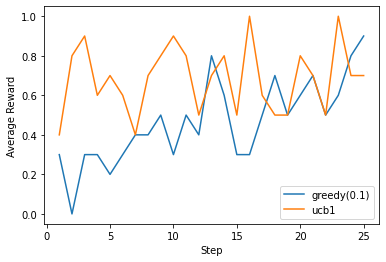

In [ ]:
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

algos = (EpsilonGreedy(0.1), UCB1())

for algo in algos:
  results = play(algo, arms, 10, 25)
  print(results)

  df = pd.DataFrame({'times': results[0], 'rewards':results[1]})
  mean = df['rewards'].groupby(df['times']).mean()
  plt.plot(mean, label = algo.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc = 'best')
plt.show()

In [ ]:
class temp():
  def __init__(self, n):
    # print("클래스가 객체화 되었습니다")
    self.n = n

  def print_n(self):
    return self.n + 1

In [ ]:
x = temp(3)

x.print_n()
x.print_n()

3
3
